# Importation des bibliothèques requis

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Importation des données

In [11]:
df = pd.read_csv(r"C:\Users\Kodjo\data1\iris_min.csv")

# Formatage

In [12]:
df['class'] = df['class'].replace("Iris-setosa", 0)
df['class'] = df['class'].replace("Iris-virginica", 1)
df['class'] = df['class'].replace("Iris-versicolor", 2)

# Visualisation en nuage de point

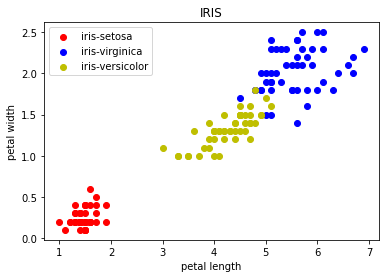

In [13]:
x=df['petal_length']
y=df['petal_width']
label=df['class']
plt.scatter(x[label==0], y[label==0], c='r', label='iris-setosa')
plt.scatter(x[label==1], y[label==1], c='b', label='iris-virginica')
plt.scatter(x[label==2], y[label==2], c='y', label='iris-versicolor')
plt.xlabel("petal length")
plt.ylabel("petal width")
plt.title("IRIS")
plt.legend()
plt.show()


# Echantillion predire

In [14]:
 #Les attribut de echantillion

In [15]:
#Valeur
longueur = 2.5
largeur = 0.75

# Visualisation

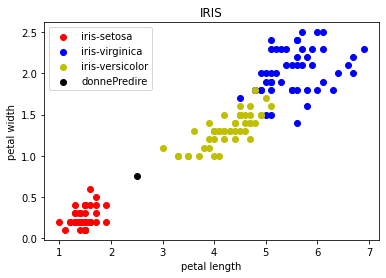

In [16]:
plt.scatter(x[label==0], y[label==0], c='r', label='iris-setosa')
plt.scatter(x[label==1], y[label==1], c='b', label='iris-virginica')
plt.scatter(x[label==2], y[label==2], c='y', label='iris-versicolor')
#On a joute au graphe
plt.scatter(longueur, largeur, color='k', label="donnePredire")
plt.xlabel("petal length")
plt.ylabel("petal width")
plt.title("IRIS")
plt.legend()
plt.show()

## Separation du jeux de donnée en training set et testing set

In [17]:
#feature
feature_columns = ['petal_length', 'petal_width']
X = df[feature_columns].values

In [18]:
#target
label = df['class']

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,label, train_size=0.8, random_state=0)

# Algorithme KNN

In [20]:
#algo KNN
k=2
from sklearn.neighbors import KNeighborsClassifier
#Creation de model de classification
model = KNeighborsClassifier(n_neighbors=k)
#(data, target)
model.fit(X_train,y_train)
model.score(X_test, y_test)

0.9333333333333333

## Optimisation du score sur les données test

In [21]:
errors = {}
valeur_k = list(range(2,15))

In [22]:
for k in valeur_k:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    score = 1-model.score(X_test, y_test)
    error = {k:score}
    errors.update(error)

In [24]:
errors

{2: 0.06666666666666665,
 3: 0.033333333333333326,
 4: 0.033333333333333326,
 5: 0.033333333333333326,
 6: 0.033333333333333326,
 7: 0.033333333333333326,
 8: 0.033333333333333326,
 9: 0.033333333333333326,
 10: 0.033333333333333326,
 11: 0.033333333333333326,
 12: 0.033333333333333326,
 13: 0.033333333333333326,
 14: 0.033333333333333326}

# Visualiser du Score d'erreur sous forme graphique

Text(0, 0.5, "Score de l'erreur de test (%)")

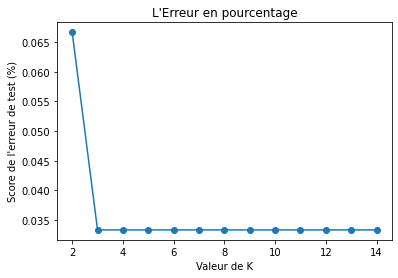

In [25]:
plt.plot( valeur_k, list(errors.values()), 'o-' )
plt.title("L'Erreur en pourcentage")
plt.xlabel("Valeur de K")
plt.ylabel("Score de l'erreur de test (%)")

In [26]:
#Donnée d'entr"
longueur = 2.5
largeur = 0.75

In [27]:
#L'algorithmique est deja importée
d = list(zip(x,y))
model = KNeighborsClassifier(n_neighbors=3)
model.fit(d, label)
prediction = model.predict([[longueur, largeur]])

In [28]:
#Fonction resltat
def resultat():
    if prediction == 0 :
        return "Resultat : setosa"
    if prediction == 1 :
        return "Resultat : virginica"
    if prediction == 2 :
        return "Resultat : verginicolor"
resultat()

'Resultat : setosa'

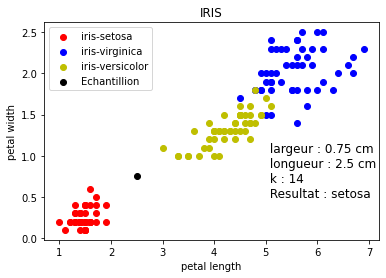

In [29]:
plt.scatter(x[label==0], y[label==0], c='r', label='iris-setosa')
plt.scatter(x[label==1], y[label==1], c='b', label='iris-virginica')
plt.scatter(x[label==2], y[label==2], c='y', label='iris-versicolor')
plt.scatter(longueur, largeur, color='k', label="Echantillion")
res = resultat()
plt.text(5,0.5, f" largeur : {largeur} cm\n longueur : {longueur} cm\n k : {k}\n {res}", fontsize=12)
plt.xlabel("petal length")
plt.ylabel("petal width")
plt.title("IRIS")
plt.legend()
plt.show()
